3.7664787602710496e-09
37928567.22411527


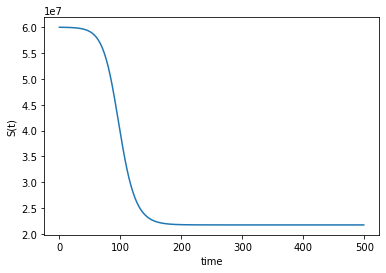

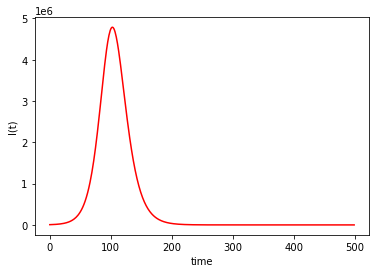

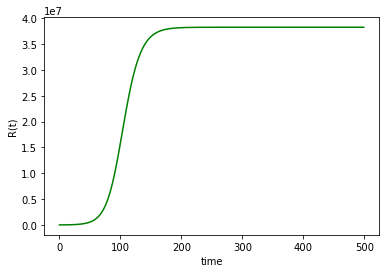

In [10]:
#Project 2 Douglas Francioni
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
# This makes the plots appear inside the notebook
%matplotlib inline

#define constants
beta = 1/7
S0 = 6*10**7
r0 = 3862.32
r1 = 966.54
r2 = 80.35
A = 8.26648
B = 0.221083
C = -0.00430354

#initial conditions
gamma = beta*S0*r1/(beta*r1+r2) 
#there were two different ways the gamma parameter was calculated
#the first way was used for the intital analysis in the paper and the second was used in later analysis
#so if you comment one and uncomment the other you can see tha some plots were obtained with one
#and the other plots with the other
R0 = np.exp(A)
I0 = B*np.exp(A)/beta
#gamma = beta*S0*B/(beta*B+B**2+2*C)
alpha = (beta/gamma)
print(alpha)
print(gamma)

#Define our derivatives for the SIR model
def f(v,t):
    S, I, R = v;
    return np.array([-alpha*S*I,alpha*S*I-beta*I,beta*I])

# define step size
h = 1;
n_steps = 500;

# define our initial conditions.
time = np.zeros(n_steps);
output = np.zeros((n_steps,3));
output[0] = [S0,I0,R0];

# Write a loop here to perform a forward euler solution. After the loop, plot the results.
n=0
for n in range(n_steps-1):
    time[n+1]=time[n]+h
    output[n+1]=output[n]+h*f(output[n],time[n])

plt.plot(time, output[:,0]);
plt.xlabel('time')
plt.ylabel('S(t)')
plt.show()

plt.plot(time, output[:,1],color='r');
plt.xlabel('time')
plt.ylabel('I(t)')
plt.show()

plt.plot(time, output[:,2],color='g');
plt.xlabel('time')
plt.ylabel('R(t)')
plt.show()

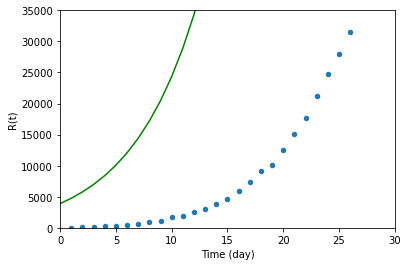

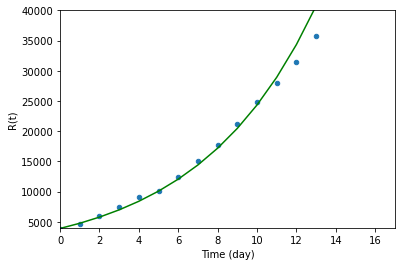

In [2]:
import pandas as pd 

#initial data set with all of the data in the paper
dat = pd.read_csv('Project 2 Infected.csv', header=0)

#plot data on the same plot
ax = dat.plot.scatter(x='Day', y='R(t)', xlabel='Time (day)', ylabel='R(t)')
plt.plot(time, output[:,2], color='g');
plt.xlim([0, 30])
plt.ylim([0, 35000])
plt.show()

#data set which starts at march 5 which is close to equal to our R0 value
dat1 = pd.read_csv('Project 2 Infected Update.csv', header=0)

#plot data on the same plot starting at March 5(which matches are initial condition for R(0))
ax = dat1.plot.scatter(x='Day', y='R(t)', xlabel='Time (day)', ylabel='R(t)')
plt.plot(time, output[:,2], color='g');
plt.xlim([0, 17])
plt.ylim([4000, 40000])
plt.show()

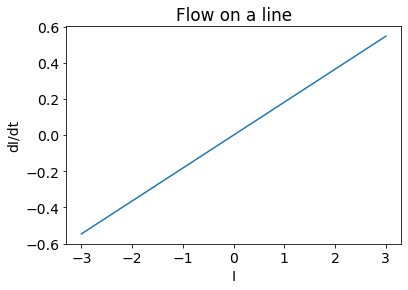

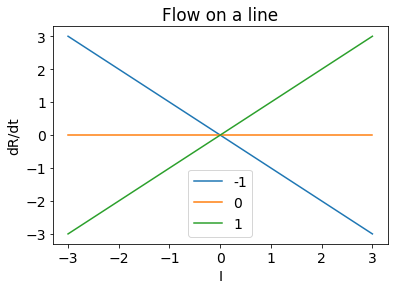

In [9]:
#Bifurcation analysis around beta parameter
#Define our derivatives for the SIR model
def dIdt(I,S,beta):
    dIdt = (beta/(beta*S0*B/(beta*B+B**2+2*C)))*S*I-beta*I
    return dIdt

#Transcritical Bifurcation
I_values = np.linspace(-3,3,100)

dIdt_values = []
for m in I_values:
    dIdt_values.append(dIdt(m,S0,1))
    
# Plot derivative vs I
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("I")
plt.ylabel("dI/dt")
plt.title("Flow on a line")
plt.plot(I_values,dIdt_values);
plt.show()

#Bifurcation analysis around beta parameter
#Define our derivatives for the SIR model
def dRdt(I,b):
    dRdt = I*b
    return dRdt

#vary the beta parameter
b = [-1,0,1]

#Transcritical Bifurcation
R_values = np.linspace(-3,3,100)

for n in b:
    dRdt_values = []
    for m in I_values:
        dRdt_values.append(dRdt(m,n))
    # Plot derivative vs R
    plt.rcParams.update({'font.size': 14})  # increase the font size
    plt.xlabel("I")
    plt.ylabel("dR/dt")
    plt.title("Flow on a line")
    plt.plot(I_values,dRdt_values);


plt.legend(labels = b)
plt.show()

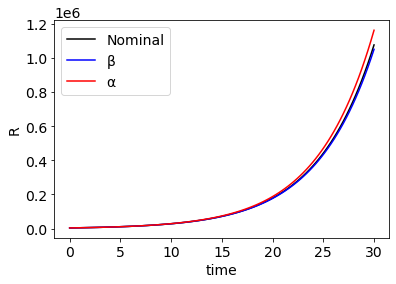

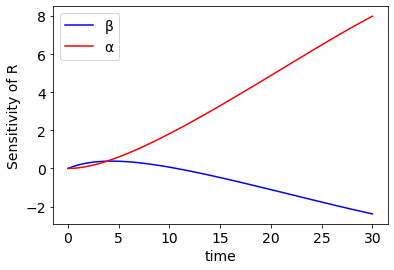

In [11]:
#sensitivity analysis
from scipy.integrate import odeint

#Define our derivatives for the SIR model
def func(v,t,beta,alpha):
    S, I, R = v;
    #return np.array([-(beta/(beta*S0*B/(beta*B+B**2+2*C)))*S*I,(beta/(beta*S0*B/(beta*B+B**2+2*C)))*S*I-beta*I,beta*I])
    return np.array([-(alpha)*S*I,(alpha)*S*I-beta*I,beta*I])

timesteps = np.linspace(0,30,100)
y0 = [S0,I0,R0];

#initially was going to use the A,B, and C parameters but decided to do alpha and beta only
# y = odeint(func, y0, timesteps, args = (1/7,0.221083,-0.00430354))
# y1 = odeint(func, y0, timesteps, args = (1/7*1.01,0.221083,-0.00430354))
# y2 = odeint(func, y0, timesteps, args = (1/7,0.221083*1.01,-0.00430354))
# y3 = odeint(func, y0, timesteps, args = (1/7,0.221083,-0.00430354*1.01))

#simulation perturbing the alpha and beta parameters by 1%
y = odeint(func, y0, timesteps, args = (1/7,5.416811680325618e-09,))
y1 = odeint(func, y0, timesteps, args = (1/7*1.01,5.416811680325618e-09,))
y2 = odeint(func, y0, timesteps, args = (1/7,5.416811680325618e-09*1.01,))

# Plot the numerical solution of the ode
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("time")
plt.ylabel("R")
plt.plot(timesteps, y[:,2],'k', label = "Nominal");
plt.plot(timesteps, y1[:,2],'b', label = "β");
plt.plot(timesteps, y2[:,2],'r', label = "α");
#plt.plot(timesteps, y3[:,2],'g', label = "C");
plt.legend()
plt.show()

# Plot the numerical solution for the sensitivity analysis
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("time")
plt.ylabel("Sensitivity of R")
plt.plot(timesteps, ((y1[:,2] - y[:,2])/y[:,2])/0.01,'b', label = "β");
plt.plot(timesteps, ((y2[:,2] - y[:,2])/y[:,2])/0.01,'r', label = "α");
#plt.plot(timesteps,((y3[:,2] - y[:,2])/y[:,2])/0.01,'g', label = "C");
plt.legend()
plt.show()